In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import itertools

In [ ]:
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

# from first to second BsaI cut site 
pClone_GFP = 'CGACTGAGACCCCGGGCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT'
max_len = 150

In [56]:
def all_substrings(s):
    n = len(s)
    indices = range(n + 1)
    substring_start_end = [(i, j) for i, j in itertools.combinations(indices, 2) if j - i <= max_len]
    substring_lengths = [j - i for i, j in substring_start_end]
    return [s[i:j] for i, j in substring_start_end], substring_start_end, substring_lengths

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    sequence = sequence.replace(' ', '')
    encoding = [mapping[nucleotide.upper()] for nucleotide in sequence]
    return encoding

In [57]:
sliced_substrings, substring_start_end, substring_lengths = all_substrings(pClone_GFP)
X_encoded = np.array([padded_one_hot_encode(substring.zfill(max_len)) for substring in sliced_substrings])
predictions = model.predict(X_encoded)

126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


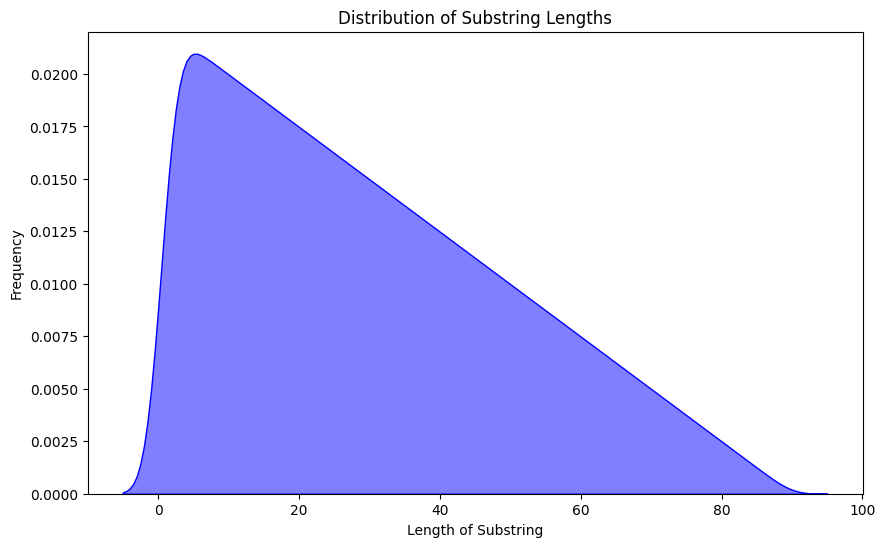

In [53]:
plt.figure(figsize=(10, 6))
sns.kdeplot(substring_lengths, bw_adjust=0.5, fill=True, color='blue', alpha=0.5)
plt.title('Distribution of Substring Lengths')
plt.xlabel('Length of Substring')
plt.ylabel('Frequency')
plt.show()

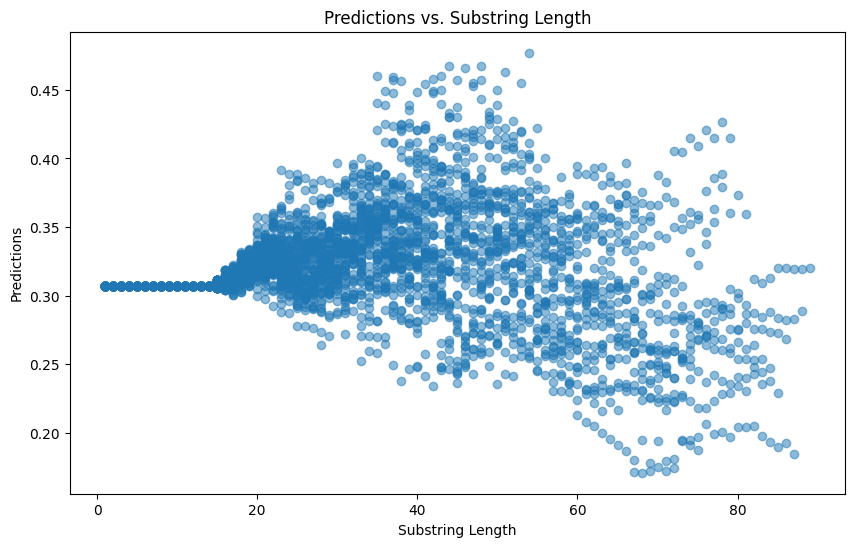

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(substring_lengths, predictions, alpha=0.5)
plt.title('Predictions vs. Substring Length')
plt.xlabel('Substring Length')
plt.ylabel('Predictions')
plt.show()

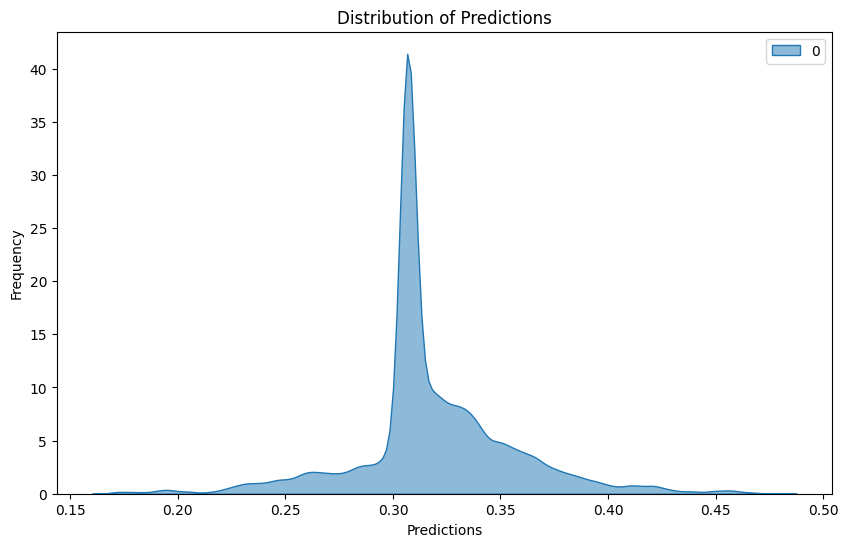

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(predictions, bw_adjust=0.5, fill=True, color='blue', alpha=0.5)
plt.title('Distribution of Predictions')
plt.xlabel('Predictions')
plt.ylabel('Frequency')
plt.show()

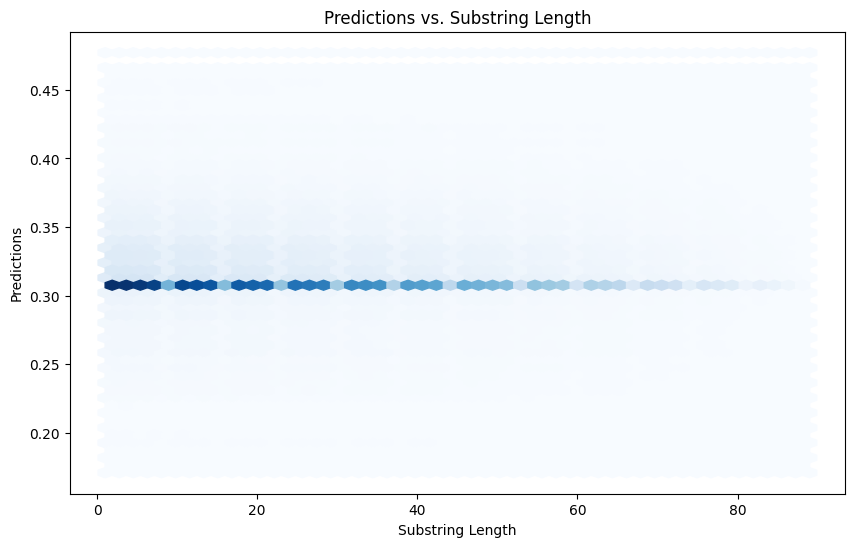

In [49]:
plt.figure(figsize=(10, 6))
plt.hexbin(substring_lengths, predictions, gridsize=50, cmap='Blues', mincnt=1)
plt.title('Predictions vs. Substring Length')
plt.xlabel('Substring Length')
plt.ylabel('Predictions')
plt.show()

In [76]:
results_df = pd.DataFrame({
    'substring': sliced_substrings,
    'start': [s[0] for s in substring_start_end],
    'end': [s[1] for s in substring_start_end],
    'length': substring_lengths,
    'prediction': predictions.flatten()
})
results_df.head()

,substring,start,end,length,prediction
0,C,0,1,1,0.306717
1,CG,0,2,2,0.306717
2,CGA,0,3,3,0.306717
3,CGAC,0,4,4,0.306717
4,CGACT,0,5,5,0.306717


In [77]:
results_df.sort_values(by='prediction', inplace=True)
results_df.head()

,substring,start,end,length,prediction
1587,TATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAA...,19,87,68,0.170706
750,ACCCCGGGCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTC...,8,75,67,0.170978
1517,CTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCA...,18,87,69,0.171804
1374,CGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGT...,16,87,71,0.172130
1301,GCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTG...,15,87,72,0.174350


In [ ]:
for i in range(5):
    print(results_df.iloc[i]['substring'])


TATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCATGCCGCTGGTCT
ACCCCGGGCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCA
CTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCATGCCGCTGGTCT
CGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCATGCCGCTGGTCT
GCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCGATGGTGTCAACGTAAATGCATGCCGCTGGTCT


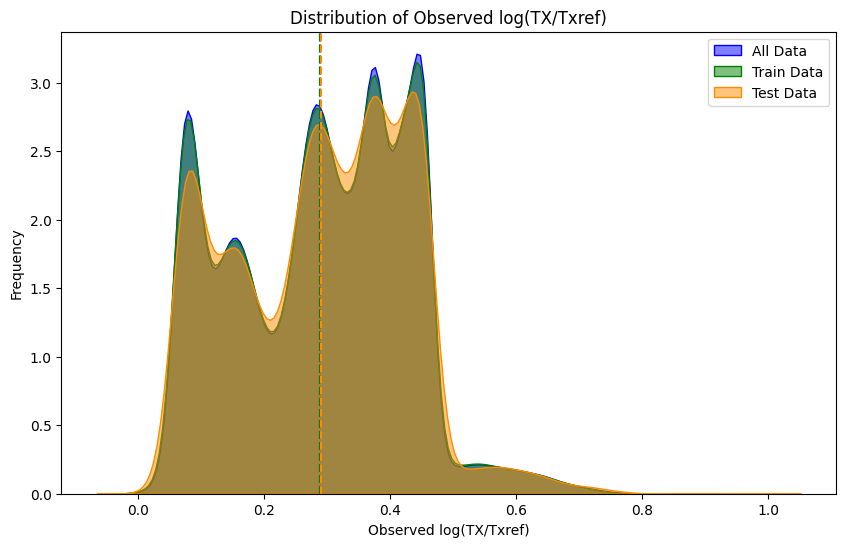

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('Data/LaFleur_supp.csv')
X = df['Promoter Sequence'].astype(str)
y = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs()).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))

sns.kdeplot(y, fill=True, color='blue', alpha=0.5, label='All Data')
plt.axvline(y.mean(), color='blue', linestyle='--', label='')

sns.kdeplot(y_train, fill=True, color='green', alpha=0.5, label='Train Data')
plt.axvline(y_train.mean(), color='green', linestyle='--', label='')

sns.kdeplot(y_test, fill=True, color='darkorange', alpha=0.5, label='Test Data')
plt.axvline(y_test.mean(), color='darkorange', linestyle='--', label='')

plt.title('Distribution of Observed log(TX/Txref)')
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [51]:
print(f"Mean of all predictions: {predictions.mean()}")
print(f"Mean of all data: {y.mean()}")
print(f"Mean of train data: {y_train.mean()}")
print(f"Mean of test data: {y_test.mean()}")

Mean of all predictions: 0.3184463381767273
Mean of all data: 0.2896422187712168
Mean of train data: 0.28935684441999426
Mean of test data: 0.2907836284046232
